# Regression

In [1]:
print("Hello World")

Hello World


## Notations
Here is a summary of some of the notation you will encounter.  

|  Notation   | Description | Python (if applicable) |
|------------|:-----------------:|---:|
|  $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars))  | `y_train` |
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$ Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


## Tools
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [2]:
# !pip freeze
# !pip install matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [5]:
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


In [6]:
i = 1
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(1), y^(1)) = (2.0, 500.0)


## Plotting 
You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

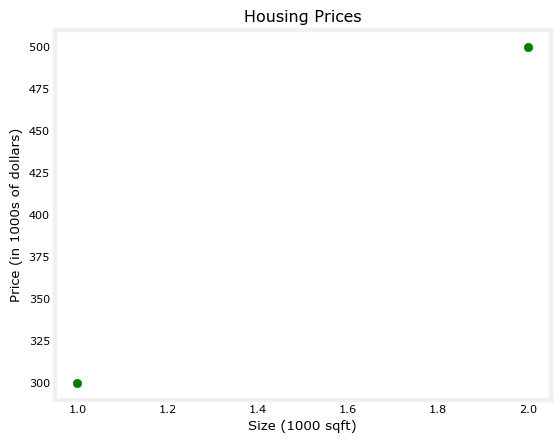

In [7]:
# Plot the data points
plt.scatter(x_train, y_train, marker='o', c='g')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

### Uni-Variate Linear Regression
* fitting line y = wx + b
* model => 
  
  ` y_pred[i] = f w,b( x[i] ) = w*x[i] + b `
  
* Cost Funtion 

  ` J(w,b) = 1/2m * SUMMATION( y_pred - y_train(i) )^2 `

* update weights as

``` 
  w = w - alpha * J(w,b)'w.r.t. w  
    = w - (alp /m) * SUMMATION( w*x[i] + b  - y_train) * x[i] 
```

``` 
  b = b - alpha * J(w,b)'w.r.t. b 
    = b - (alp /m) * SUMMATION( w*x[i] + b  - y_train) 
```

* Cost minimization by BATCH GRADIENT DESCENT algorithm with fixed learning rate

(w,b) found by gradient descent: (199.7249,100.4451)


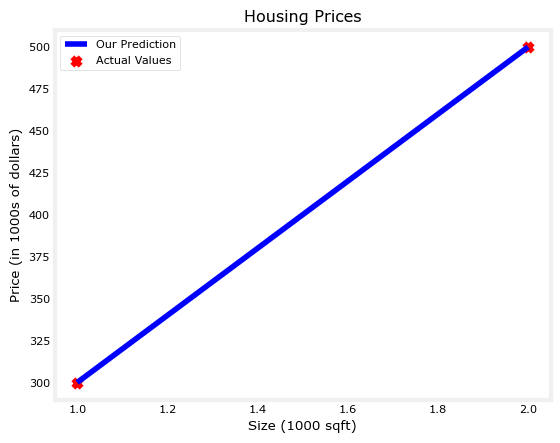

(300.1699960700297, 340.11498418617737, 499.8949366507681)

In [8]:
# Implementation of UNI - VAR - LIN - REG
import  matplotlib.pyplot as plt
import numpy as np
import math 
import copy

class Uni_Var_Linear_Regression:
    def __init__(self,x_train = np.array([1.0, 2.0]) ,y_train = np.array([300.0, 500.0]), b_init = 0,w_init = 0,iterations = 10000,alpha = 0.001) -> None:
        self.x_train = x_train  #features
        self.y_train = y_train   #target value
        self.w = w_init
        self.b = b_init
        self.iterations = iterations
        self.alpha = alpha
        self.w_final, self.b_final = [0,0]

    #Function to calculate the cost
    def compute_cost(self):
        m = self.x_train.shape[0] 
        cost = 0
        for i in range(m):
            f_wb = self.w * self.x_train[i] + self.b
            cost = cost + (f_wb - self.y_train[i])**2
        total_cost = 1 / (2 * m) * cost
        return total_cost

    #Function to calculate the gradient
    def compute_gradient(self): 
        m = self.x_train.shape[0]    
        dj_dw = 0.0
        dj_db = 0.0
        for i in range(m):  
            f_wb = self.w * self.x_train[i] + self.b 
            dj_dw_i = (f_wb - self.y_train[i]) * self.x_train[i] 
            dj_db_i = f_wb - self.y_train[i] 
            dj_db += dj_db_i
            dj_dw += dj_dw_i 
        dj_dw = dj_dw / m 
        dj_db = dj_db / m         
        return dj_dw, dj_db

    #gradient descent algorithm
    def gradient_descent(self): 
        w = copy.deepcopy(self.w) # avoid modifying global w_in
        for i in range(self.iterations):
            # Calculate the gradient and update the parameters using gradient_function
            dj_dw, dj_db = self.compute_gradient()
            # Update Parameters using equation (3) above
            self.b = self.b - self.alpha * dj_db
            self.w = self.w - self.alpha * dj_dw
            # Save cost J at each iteration
            if i < 100000:      # prevent resource exhaustion 
                self.compute_cost()
        # return w, b
        self.w_final = self.w
        self.b_final = self.b
        print(f"(w,b) found by gradient descent: ({self.w_final:8.4f},{self.b_final:8.4f})")

    def predict (self,xi):
        return self.w_final*(xi/1000) +self.b_final
    
    def compute_model_output(self):
        m = self.x_train.shape[0]
        f_wb = np.zeros(m)
        for i in range(m):
            f_wb[i] = self.w_final * self.x_train[i] + self.b_final
        return f_wb
    def plottt(self):
        # Plot our model prediction
        plt.plot(self.x_train, self.compute_model_output(), c='b',label='Our Prediction')

        # Plot the data points
        plt.scatter(self.x_train, self.y_train, marker='x', c='r',label='Actual Values')

        # Set the title
        plt.title("Housing Prices")
        # Set the y-axis label
        plt.ylabel('Price (in 1000s of dollars)')
        # Set the x-axis label
        plt.xlabel('Size (1000 sqft)')
        plt.legend()
        plt.show()
        
LinReg_default = Uni_Var_Linear_Regression(iterations=50000)
LinReg_default.gradient_descent()
p1 = LinReg_default.predict(1000) #  predict for 1000 ft
p2 = LinReg_default.predict(1200) #  predict for 1200 ft
p3 = LinReg_default.predict(2000) #  predict for 2000 ft
LinReg_default.plottt()
p1,p2,p3

(w,b) found by gradient descent: ( 13.5811, 73.0779)


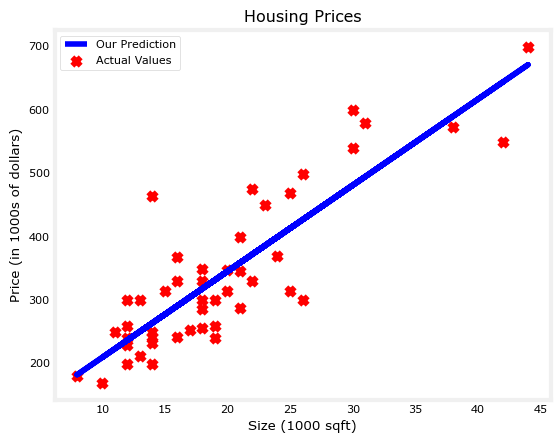

In [9]:
with open('data_custom.txt') as f:
    d = f.read()
d = d.split('\n')
for i in range(len(d)):
    k = d[i].split(',')
    for j in range(len(k)):
        k[j] = int(k[j])
    d[i] = k
SqrFeet = []
prices = []
for i in d:
    SqrFeet.append(i[0])
    prices.append(i[1])
LinReg_New_data = Uni_Var_Linear_Regression(np.array(SqrFeet),np.array(prices),alpha=0.001,iterations=100000)
LinReg_New_data.gradient_descent()
LinReg_New_data.plottt()